---

<p align="center">
  <strong><span style="font-size: 36px;">Mental Health Prediction</span></strong>
</p>

---

# **Understanding Data**

In [4]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

In [5]:
data = pd.read_csv(r'C:\Users\Atharva Bhattad\OneDrive\Desktop\Python\New\Interview Revision\survey.csv')

In [6]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
data.shape

(1259, 27)

In [10]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [11]:
cols= ['Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence','comments']

In [12]:
for i in cols:
    print(i)
    print(data[i].unique())

Age
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning andr

---
# **Data Cleaning and Preprocessing** 

In [13]:
data = data.drop(['state','Timestamp'], axis=1)

In [14]:
male = ['M', 'Male' ,'male', 'm' ,'Male-ish', 'maile', 
 'something kinda male?', 'Cis Male', 'Mal',
 'Male (CIS)', 'Make', 'Male ',
 'Man', 'msle', 'Mail', 'cis male' ,'Malr', 
 'Cis Man', 'ostensibly male, unsure what that really means']

female = ['Female' ,'female', 
 'Cis Female', 'F', 'Woman' ,'f' ,'Femake' ,'woman' ,'Female ',
 'cis-female/femme','Female (cis)', 'femail']

data.loc[data['Gender'].isin(male), 'Gender'] = 'Male'
data.loc[data['Gender'].isin(female), 'Gender'] = 'Female'
data.loc[~data['Gender'].isin(male + female), 'Gender'] = 'Other'

In [15]:
data['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [16]:
data = data[data['Age'].isin(range(18, 100))]

In [17]:
data['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [18]:
def agecat(x):
    if x<=20:
        return 'teen'
    elif x>20 and x<=30:
        return 'adult'
    elif x>30 and x<=50:
        return 'middle_age'
    else:
        return 'old'

In [19]:
data['Age_cat']= data['Age'].apply(lambda x: agecat(x))

In [20]:
data['Age_cat'].unique()    

array(['middle_age', 'adult', 'teen', 'old'], dtype=object)

In [21]:
data.shape

(1251, 26)

---
# **Handling Missing Values**

In [22]:
df = data.isnull().sum() 
df

Age                             0
Gender                          0
Country                         0
self_employed                  18
family_history                  0
treatment                       0
work_interfere                262
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1090
Age_cat                         0
dtype: int64

<Axes: >

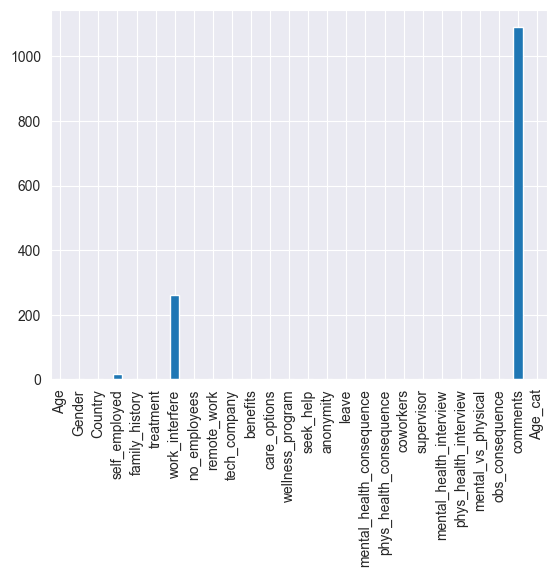

In [23]:
df.plot(kind='bar')

In [24]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

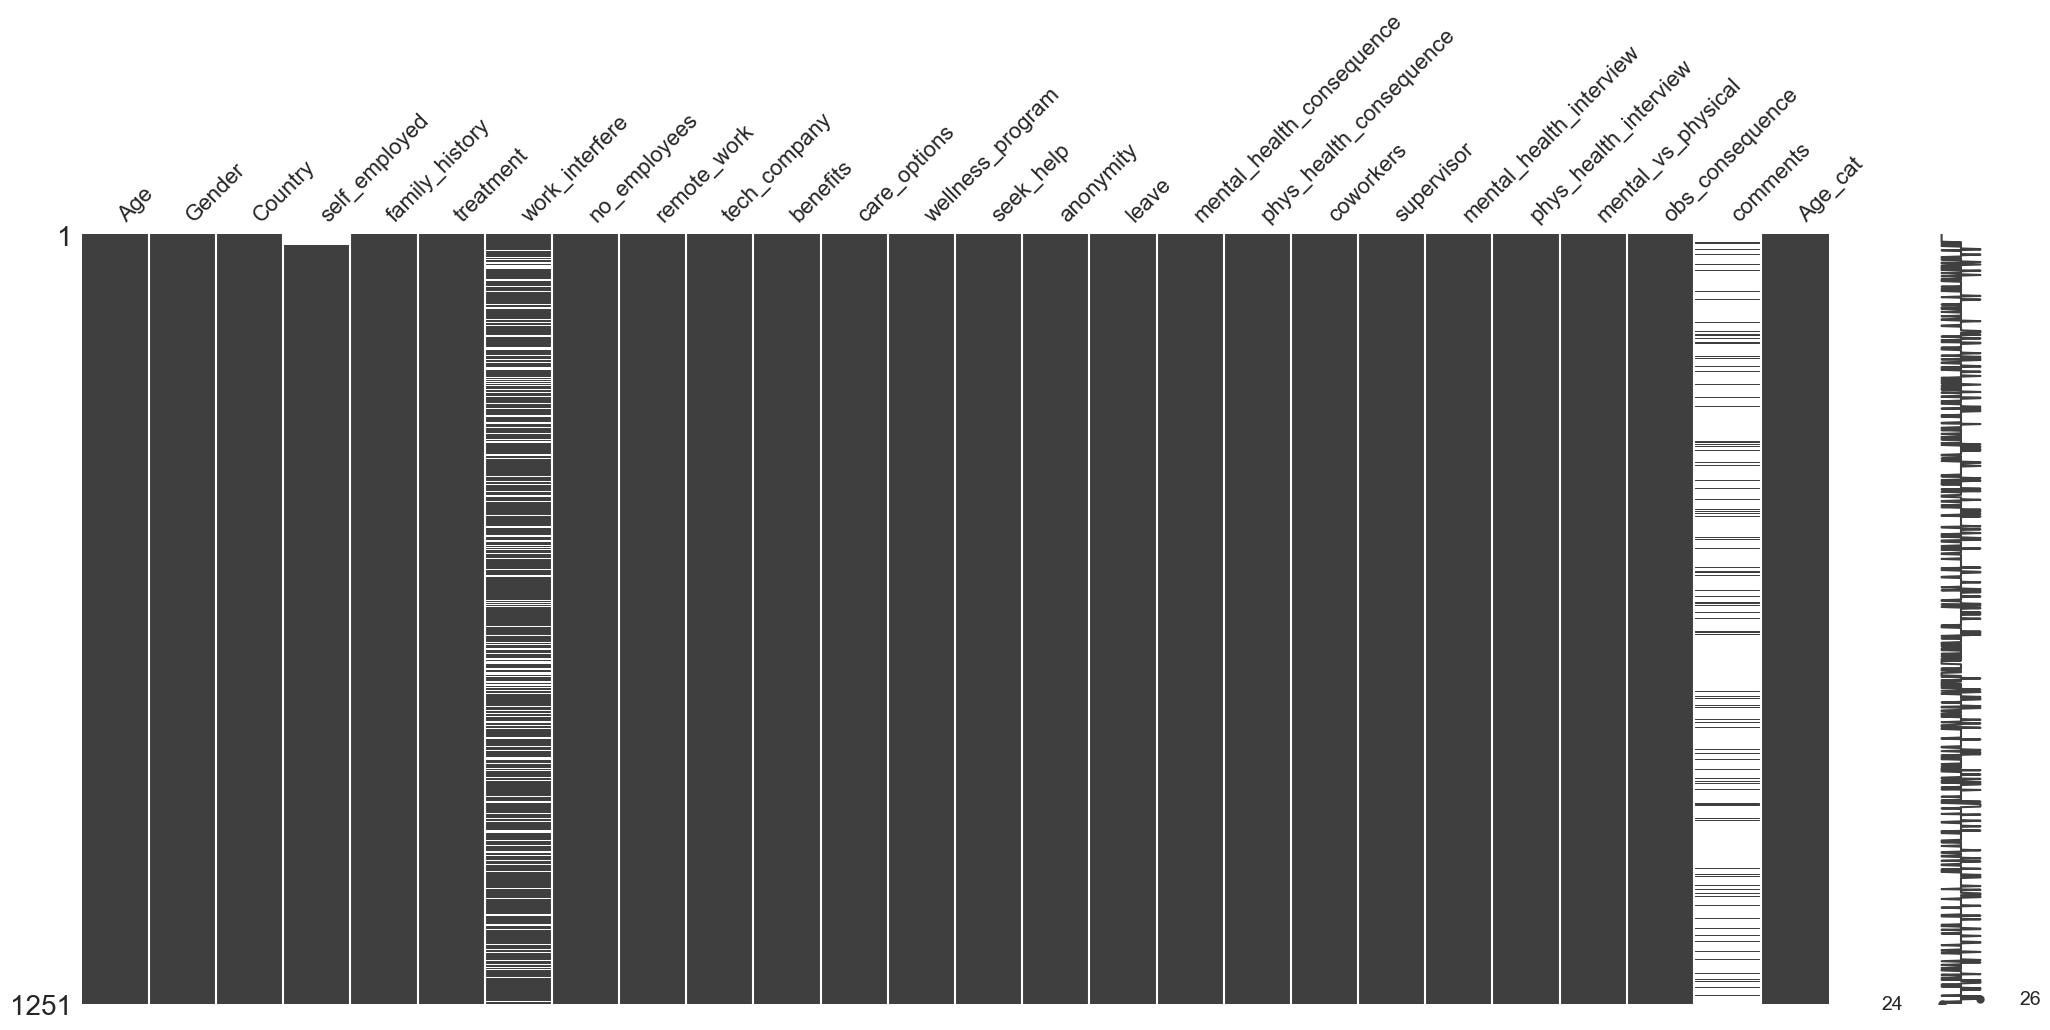

In [25]:
import missingno as m
m.matrix(data)


In [26]:
for i in data['work_interfere']:
    data['work_interfere'] = data['work_interfere'].fillna("Don't know")
for i in data['self_employed']:
    data['self_employed'] = data['self_employed'].fillna("No")
for i in data['comments']:
    data['comments'] = data['comments'].fillna("No comments")


In [27]:
data.isnull().sum() 


Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
Age_cat                      0
dtype: int64

---
# **Normalization**

In [28]:
data.shape

(1251, 26)

In [29]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
X = model.encode(data['comments'].values, show_progress_bar=True)

print(X.shape)  # (2, 384)


c:\Users\Atharva Bhattad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Batches:   0%|          | 0/40 [00:00<?, ?it/s]

(1251, 384)


In [30]:
X_df = pd.DataFrame(X)  # Convert to DataFrame
data = data.reset_index(drop=True)  # Ensure no mismatched indices
X_df = X_df.reset_index(drop=True)
data = pd.concat([data, X_df], axis=1)

In [31]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,374,375,376,377,378,379,380,381,382,383
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152


In [32]:
data.shape

(1251, 410)

In [33]:
data = data.drop(['comments'], axis=1)

In [34]:
data.tail(8)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,374,375,376,377,378,379,380,381,382,383
1243,36,Male,South Africa,No,Yes,Yes,Often,100-500,No,No,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1244,29,Male,United States,No,Yes,Yes,Sometimes,100-500,Yes,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1245,36,Male,United States,No,Yes,No,Rarely,More than 1000,No,No,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1246,26,Male,United Kingdom,No,No,Yes,Don't know,26-100,No,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1247,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1248,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1249,46,Female,United States,No,No,No,Don't know,100-500,Yes,Yes,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1250,25,Male,United States,No,Yes,Yes,Sometimes,26-100,No,No,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152


---
# **Exploratory Data Analysis**

In [35]:
data.columns[:25]

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_cat'],
      dtype='object')

   Gender treatment  count
0  Female       Yes    170
1  Female        No     77
2    Male        No    539
3    Male       Yes    449
4   Other       Yes     13
5   Other        No      3


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\3509287309.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  sns.barplot(x= 'Gender',y='count',hue = 'treatment',data = temp_df,color = color[0])


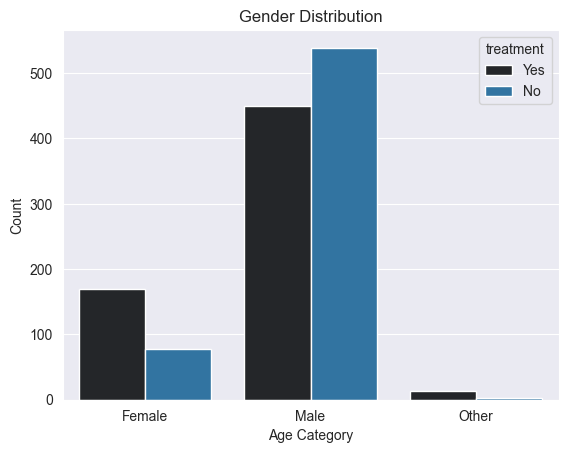

In [36]:
temp_df = data.groupby('Gender')['treatment'].value_counts().reset_index()
print(temp_df)
sns.barplot(x= 'Gender',y='count',hue = 'treatment',data = temp_df,color = color[0])
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

      Age_cat treatment  count
0       adult        No    292
1       adult       Yes    265
2  middle_age       Yes    341
3  middle_age        No    305
4         old       Yes     17
5         old        No      9
6        teen        No     13
7        teen       Yes      9


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\4156366726.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  sns.barplot(x= 'Age_cat',y='count',hue = 'treatment',data = temp_df,color = color[0],order = order)


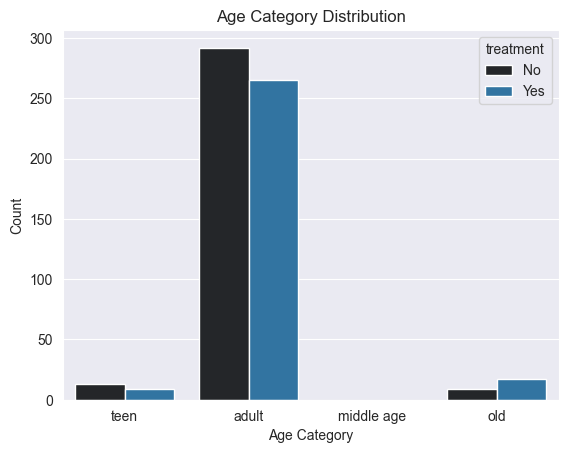

In [37]:
temp_df = data.groupby('Age_cat')['treatment'].value_counts().reset_index()
print(temp_df)
order = ['teen','adult','middle age','old']
sns.barplot(x= 'Age_cat',y='count',hue = 'treatment',data = temp_df,color = color[0],order = order)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category Distribution')
plt.show()

       Age_cat  Gender  count
0        adult    Male    421
1        adult  Female    127
2        adult   Other      9
3   middle_age    Male    525
4   middle_age  Female    115
5   middle_age   Other      6
6          old    Male     24
7          old  Female      2
8         teen    Male     18
9         teen  Female      3
10        teen   Other      1


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\3757878788.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  ax = sns.barplot(x= 'Age_cat',y='count',hue = 'Gender',data = temp_df,color = color[0],order=order)


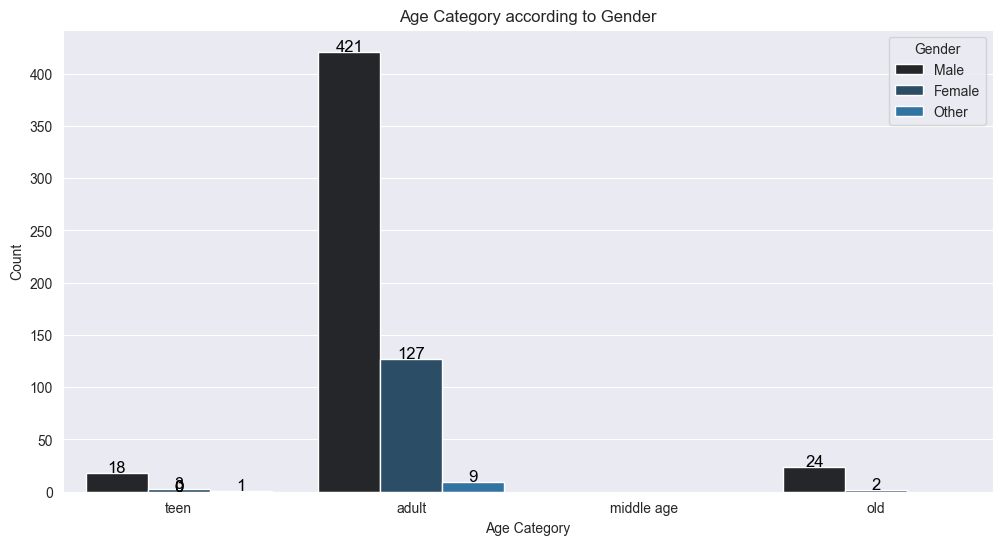

In [38]:
temp_df = data.groupby('Age_cat')['Gender'].value_counts().reset_index()
print(temp_df)
plt.figure(figsize=(12, 6))
order=['teen','adult','middle age','old']
ax = sns.barplot(x= 'Age_cat',y='count',hue = 'Gender',data = temp_df,color = color[0],order=order)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,  
            p.get_height() + 0.5,        
            f'{p.get_height():.0f}',   
            ha='center',                 
            fontsize=12, 
            color='black')

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category according to Gender')
plt.show()

  remote_work treatment  count
0          No        No    443
1          No       Yes    437
2         Yes       Yes    195
3         Yes        No    176


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\868054951.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  ax = sns.barplot(x= 'remote_work',y='count',hue = 'treatment',data = temp_df,color = color[0])


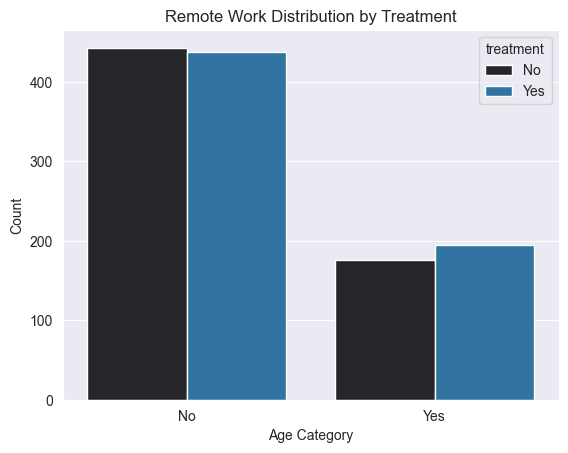

In [39]:
temp_df = data.groupby('remote_work')['treatment'].value_counts().reset_index()
print(temp_df)
ax = sns.barplot(x= 'remote_work',y='count',hue = 'treatment',data = temp_df,color = color[0])

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Remote Work Distribution by Treatment')
plt.show()

      no_employees treatment  count
0              1-5       Yes     88
1              1-5        No     70
2          100-500       Yes     95
3          100-500        No     80
4           26-100       Yes    149
5           26-100        No    139
6         500-1000        No     33
7         500-1000       Yes     27
8             6-25        No    162
9             6-25       Yes    127
10  More than 1000       Yes    146
11  More than 1000        No    135


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\3312617010.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  ax = sns.barplot(x= 'no_employees',y='count',hue = 'treatment',data = temp_df,color = color[0],order = order)


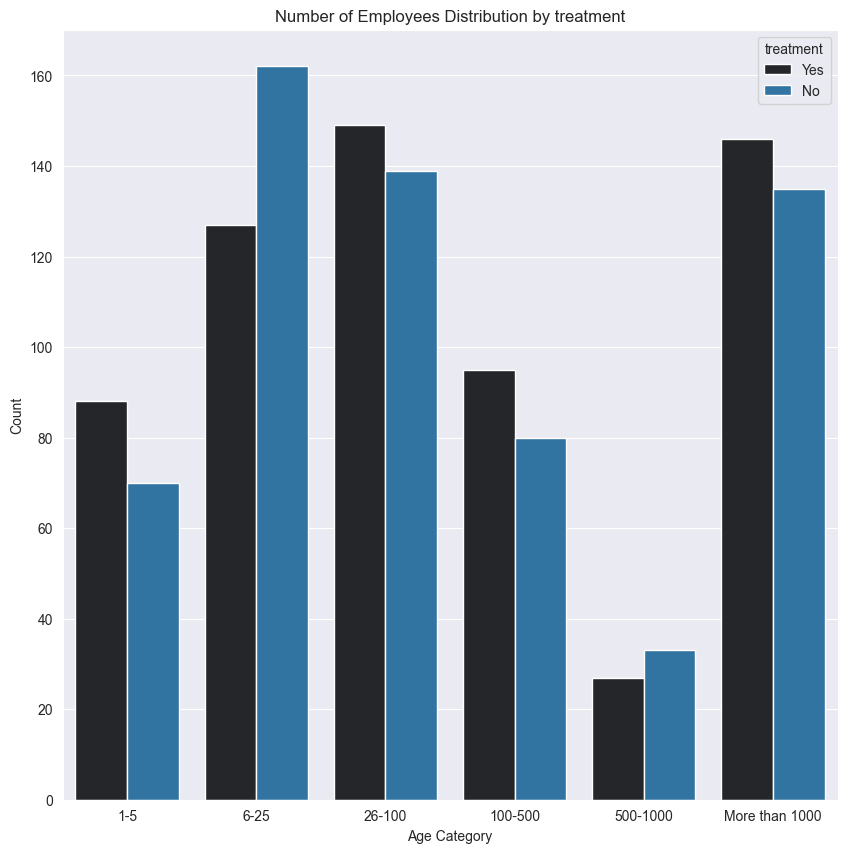

In [40]:
temp_df = data.groupby('no_employees')['treatment'].value_counts().reset_index()
print(temp_df)
plt.figure(figsize=(10, 10))
order=['1-5','6-25','26-100','100-500','500-1000','More than 1000']
ax = sns.barplot(x= 'no_employees',y='count',hue = 'treatment',data = temp_df,color = color[0],order = order)

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Number of Employees Distribution by treatment')
plt.show()

  self_employed treatment  count
0            No       Yes    557
1            No        No    552
2           Yes       Yes     75
3           Yes        No     67


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\1834949789.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  ax = sns.barplot(x= 'self_employed',y='count',hue = 'treatment',data = temp_df,color = color[0])


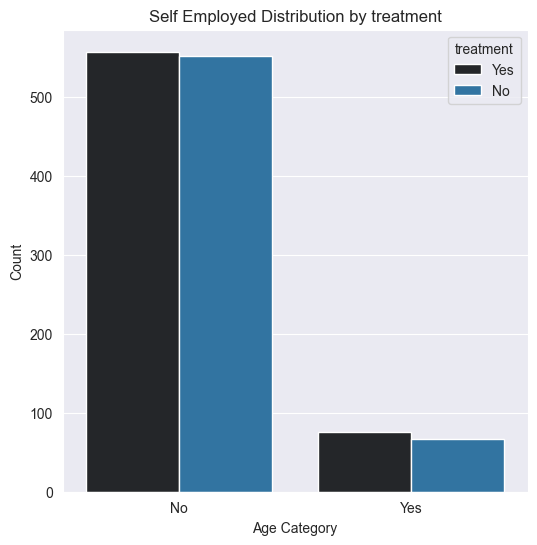

In [41]:
temp_df = data.groupby("self_employed")["treatment"].value_counts().reset_index()
print(temp_df)
plt.figure(figsize=(6, 6))
ax = sns.barplot(x= 'self_employed',y='count',hue = 'treatment',data = temp_df,color = color[0])

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Self Employed Distribution by treatment')
plt.show()


  work_interfere treatment  count
0     Don't know        No    258
1     Don't know       Yes      4
2          Never        No    182
3          Never       Yes     30
4          Often       Yes    119
5          Often        No     21
6         Rarely       Yes    122
7         Rarely        No     51
8      Sometimes       Yes    357
9      Sometimes        No    107


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\3665959651.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  ax = sns.barplot(x= 'work_interfere',y='count',hue = 'treatment',data = temp_df,color = color[0])


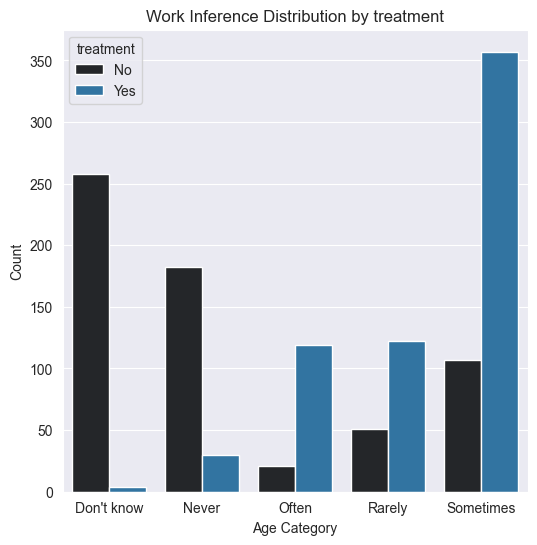

In [42]:
temp_df = data.groupby("work_interfere")["treatment"].value_counts().reset_index()
print(temp_df)
plt.figure(figsize=(6, 6))
ax = sns.barplot(x= 'work_interfere',y='count',hue = 'treatment',data = temp_df,color = color[0])

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Work Inference Distribution by treatment')
plt.show()


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\756971205.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  sns.countplot(data=data,x='mental_vs_physical',hue='treatment',color=color[0])


Text(0.5, 0, 'Mental vs Physical')

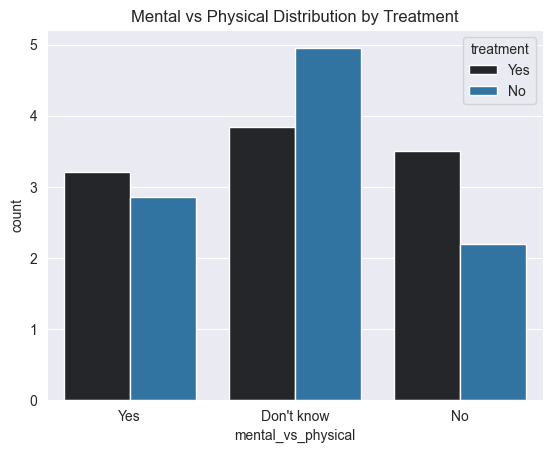

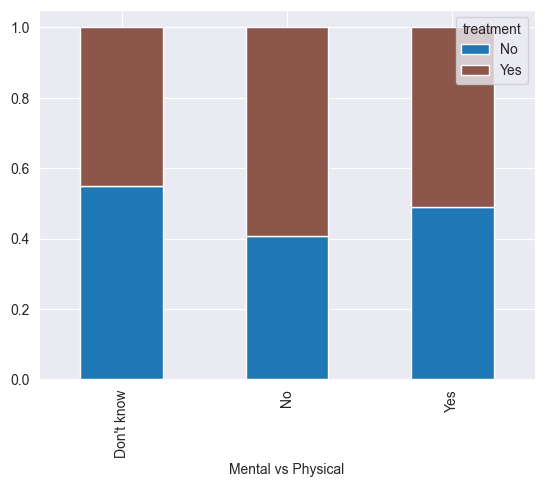

In [43]:
data['mental_vs_physical'].value_counts()
sns.countplot(data=data,x='mental_vs_physical',hue='treatment',color=color[0])
plt.title('Mental vs Physical Distribution by Treatment')
pivot_supervisor = pd.crosstab(data['mental_vs_physical'], data['treatment'])
pivot_supervisor.div(pivot_supervisor.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, color=[color[0], color[5]])
plt.xlabel('Mental vs Physical')


C:\Users\Atharva Bhattad\AppData\Local\Temp\ipykernel_1808\3422332454.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  ax = sns.barplot(x= 'family_history',y='count',hue = 'treatment',data = temp_df,color = color[0])


  family_history treatment  count
0             No        No    492
1             No       Yes    270
2            Yes       Yes    362
3            Yes        No    127


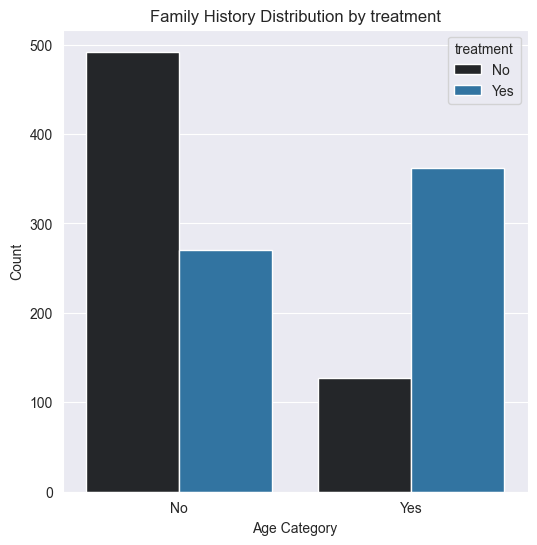

In [44]:
temp_df = data.groupby("family_history")["treatment"].value_counts().reset_index()
print(temp_df)
plt.figure(figsize=(6, 6))
ax = sns.barplot(x= 'family_history',y='count',hue = 'treatment',data = temp_df,color = color[0])

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Family History Distribution by treatment')
plt.show()

Text(0.5, 1.0, 'ANONIMITY AND SEEKING HELP')

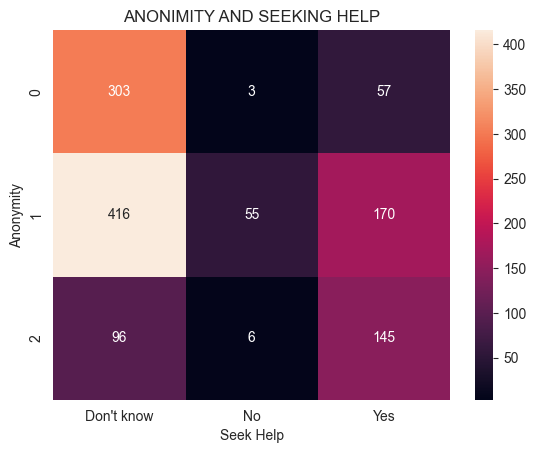

In [45]:
pivot_df = data.pivot_table(index='seek_help',columns='anonymity',values = "treatment",aggfunc='count').reset_index().drop('seek_help',axis=1)
sns.heatmap(pivot_df,annot=True,fmt='g')
plt.xlabel('Seek Help')
plt.ylabel('Anonymity')
plt.title('ANONIMITY AND SEEKING HELP')

In [46]:
data.columns[:25]

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_cat'],
      dtype='object')

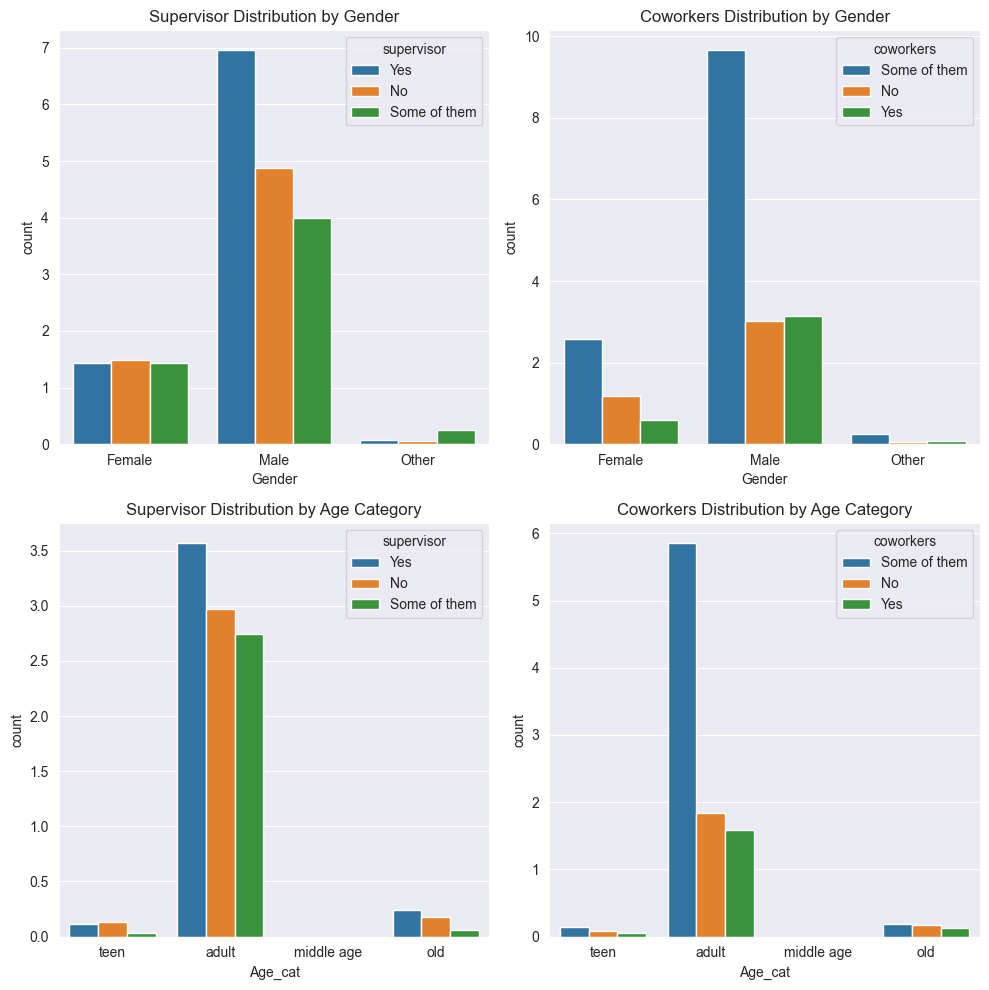

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
order = ['teen','adult','middle age','old']
sns.countplot(x='Gender', hue='supervisor', data=data, ax=axes[0, 0])
axes[0,0].set_title('Supervisor Distribution by Gender')
sns.countplot(x='Gender', hue='coworkers', data=data, ax=axes[0, 1])
axes[0,1].set_title('Coworkers Distribution by Gender')
sns.countplot(x='Age_cat', hue='supervisor', data=data, ax=axes[1, 0],order=order)
axes[1,0].set_title('Supervisor Distribution by Age Category')
sns.countplot(x='Age_cat', hue='coworkers', data=data, ax=axes[1, 1],order=order)
axes[1,1].set_title('Coworkers Distribution by Age Category')
plt.tight_layout()  
plt.show()

---
# **Feature Engineering**

In [48]:
data.columns

Index([           'Age',         'Gender',        'Country',  'self_employed',
       'family_history',      'treatment', 'work_interfere',   'no_employees',
          'remote_work',   'tech_company',
       ...
                    374,              375,              376,              377,
                    378,              379,              380,              381,
                    382,              383],
      dtype='object', length=409)

In [49]:
features = ['Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoders = {}
for feature in features:
    if feature in data.columns:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = {label: index for index, label in enumerate(le.classes_)}
with open("label_encoder.json", "w") as f:
    json.dump(label_encoders, f)

In [50]:
data.head(3)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,374,375,376,377,378,379,380,381,382,383
0,37,0,44,0,0,1,2,6-25,0,1,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1,44,1,44,0,0,0,3,More than 1000,0,0,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
2,32,1,6,0,0,0,3,6-25,0,1,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152


In [51]:
ordinal_features = ['no_employees','Age_cat']

In [52]:
data['Age_cat'].unique()

array(['middle_age', 'adult', 'teen', 'old'], dtype=object)

In [53]:
import joblib
no_employees = [['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']]
encoder = OrdinalEncoder(categories=no_employees)
data['no_employees'] = encoder.fit_transform(data[['no_employees']])
data['no_employees'] = data['no_employees'].astype(int)
joblib.dump(encoder, 'ordinal_encoder_no_employees.pkl')

['ordinal_encoder_no_employees.pkl']

In [54]:
Age_cat = [['teen', 'adult', 'middle_age', 'old']]
encoder = OrdinalEncoder(categories=Age_cat)
data['Age_cat'] = encoder.fit_transform(data[['Age_cat']])
data['Age_cat'] = data['Age_cat'].astype(int)
joblib.dump(encoder, 'ordinal_encoder_Age_cat.pkl')

['ordinal_encoder_Age_cat.pkl']

In [55]:
for i in features:
    print(i)
    print(data[i].unique())

Gender
[0 1 2]
Country
[44  6 43  5 14 33 27 41 32  0 16 35 25  4 37  9  1 20 19 38 22 40  8 24
 34  2 28 39 13 45 21  3 18 36 23 29 10 30 42 12 17 26 15  7 11 31]
self_employed
[0 1]
family_history
[0 1]
treatment
[1 0]
work_interfere
[2 3 1 4 0]
remote_work
[0 1]
tech_company
[1 0]
benefits
[2 0 1]
care_options
[1 0 2]
wellness_program
[1 0 2]
seek_help
[2 0 1]
anonymity
[2 0 1]
leave
[2 0 1 3 4]
mental_health_consequence
[1 0 2]
phys_health_consequence
[1 2 0]
coworkers
[1 0 2]
supervisor
[2 0 1]
mental_health_interview
[1 2 0]
phys_health_interview
[0 1 2]
mental_vs_physical
[2 0 1]
obs_consequence
[0 1]


In [56]:
for i in ordinal_features:
    print(i)
    print(data[i].unique())


no_employees
[1 5 2 3 0 4]
Age_cat
[2 1 0 3]


In [57]:
data.drop('Age', axis=1, inplace=True)

In [58]:
data.head(3)

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,374,375,376,377,378,379,380,381,382,383
0,0,44,0,0,1,2,1,0,1,2,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
1,1,44,0,0,0,3,5,0,0,0,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152
2,1,6,0,0,0,3,1,0,1,1,...,0.028027,0.076757,0.008251,0.022248,0.032801,0.027821,0.074526,-0.094248,0.012882,0.004152


---
# **Feature Selection**

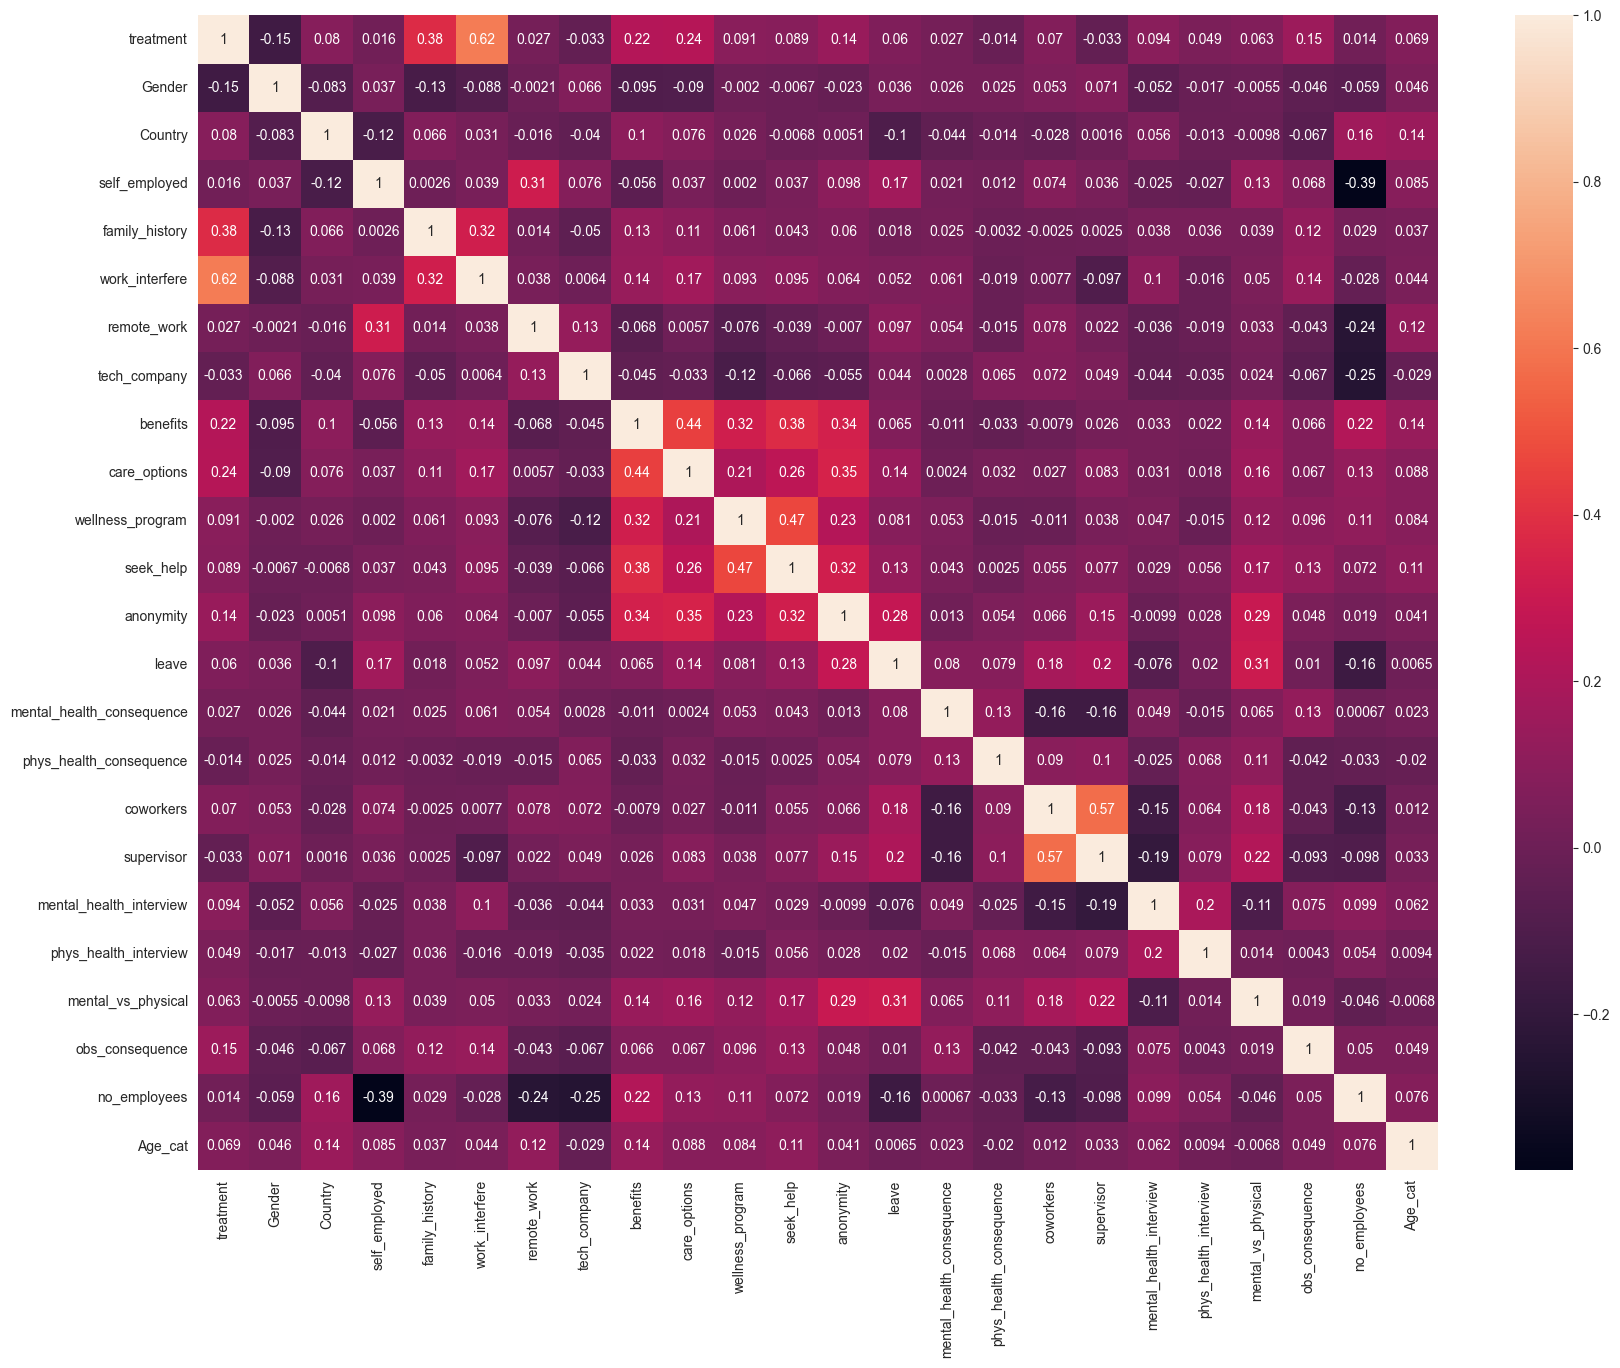

In [59]:
correlation_matrix = data[[ 'treatment', 'Gender', 'Country', 'self_employed', 
                            'family_history', 'work_interfere', 'remote_work',
                            'tech_company', 'benefits', 'care_options', 'wellness_program',
                            'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                            'phys_health_consequence', 'coworkers', 'supervisor',
                            'mental_health_interview', 'phys_health_interview',
                            'mental_vs_physical', 'obs_consequence','no_employees','Age_cat']].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [60]:
correlation_matrix = data.corr()
treatment_correlations = correlation_matrix['treatment'].drop('treatment')
top_10_correlated_features = treatment_correlations.abs().sort_values(ascending=False).head(10)
print(top_10_correlated_features)


work_interfere     0.615075
family_history     0.376674
care_options       0.235429
benefits           0.224731
Gender             0.153524
obs_consequence    0.152524
anonymity          0.142364
98                 0.133150
329                0.132232
43                 0.125166
Name: treatment, dtype: float64


In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data.columns = data.columns.astype(str)
X = data[['Gender', 'Country', 'self_employed', 
                            'family_history', 'work_interfere', 'remote_work',
                            'tech_company', 'benefits', 'care_options', 'wellness_program',
                            'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                            'phys_health_consequence', 'coworkers', 'supervisor',
                            'mental_health_interview', 'phys_health_interview',
                            'mental_vs_physical', 'obs_consequence','no_employees','Age_cat']]
y = data['treatment']
chi2_selector = SelectKBest(chi2, k=10)  # Select the top 10 features
X_selected = chi2_selector.fit_transform(X, y)


In [62]:
# Get the boolean mask of selected features
selected_mask = chi2_selector.get_support()

# Get the column names of selected features
selected_features = X.columns[selected_mask]

# Print selected feature names
print(selected_features)


Index(['Gender', 'Country', 'family_history', 'work_interfere', 'benefits',
       'care_options', 'seek_help', 'anonymity', 'leave', 'obs_consequence'],
      dtype='object')


In [63]:
data['treatment'].value_counts()

treatment
1    632
0    619
Name: count, dtype: int64

Therefore the dataset is balanced and no need for oversampling and undersampling 

# **Model Development**

Two model for comparison between the features of the Correlation and Chisquare test.

---
Considering features of Chisquare test(without embeddings)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report

X = data[['Gender', 'Country', 'family_history', 'work_interfere', 'benefits',
       'care_options', 'seek_help', 'anonymity', 'leave', 'obs_consequence']]
y = data['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report: \n{report}")


Accuracy: 0.8015873015873016
Precision: 0.7662337662337663
Recall: 0.8939393939393939
F1 Score: 0.8251748251748252
Confusion Matrix: 
[[42 18]
 [ 7 59]]
ROC AUC: 0.7969696969696969
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.70      0.77        60
           1       0.77      0.89      0.83        66

    accuracy                           0.80       126
   macro avg       0.81      0.80      0.80       126
weighted avg       0.81      0.80      0.80       126



In [65]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report: \n{report}")


Accuracy: 0.7301587301587301
Precision: 0.7222222222222222
Recall: 0.7878787878787878
F1 Score: 0.7536231884057971
Confusion Matrix: 
[[40 20]
 [14 52]]
ROC AUC: 0.7272727272727273
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        60
           1       0.72      0.79      0.75        66

    accuracy                           0.73       126
   macro avg       0.73      0.73      0.73       126
weighted avg       0.73      0.73      0.73       126



---
Considering Features of Correlation(with Embeddings)

# **Random Forest**

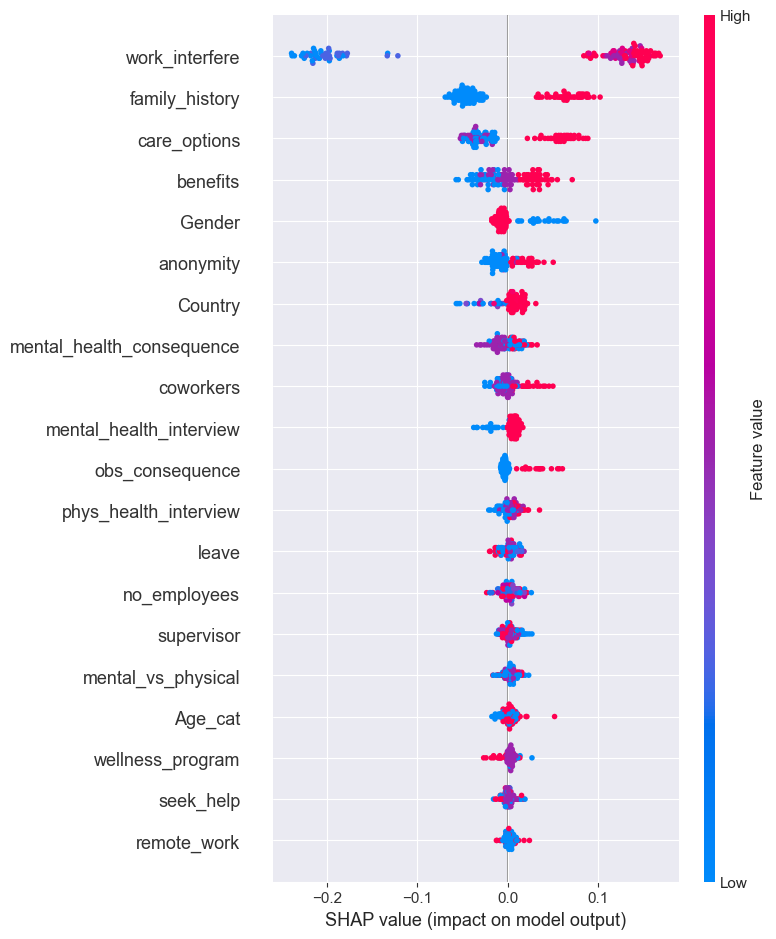

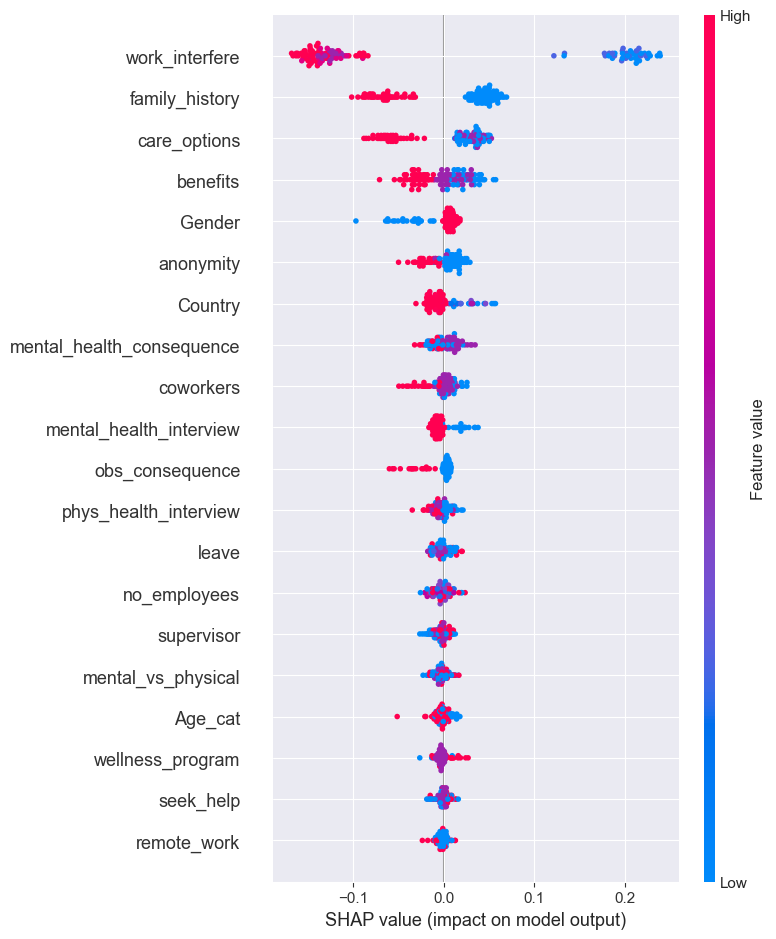

In [66]:
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report

X = data.drop('treatment', axis=1)
y = data['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_true = model.predict(X_val)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)
'''
check_additivity=True (default): Ensures SHAP values add up exactly to the model’s output but is slower.
check_additivity=False: Faster computation, slight numerical mismatches but good for large models.
'''
# Choose a specific class (e.g., class 1)
shap_values_class_1 = shap_values[:, :, 1]
shap.summary_plot(shap_values_class_1, X_test)
shap_values_class_0 = shap_values[:, :, 0]
shap.summary_plot(shap_values_class_0, X_test)


Since SHAP is based on game theory, it assigns contributions to each feature by comparing predictions across different subsets of features.

test results

In [67]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report: \n{report}")

Accuracy: 0.8253968253968254
Precision: 0.8142857142857143
Recall: 0.8636363636363636
F1 Score: 0.8382352941176471
Confusion Matrix: 
[[47 13]
 [ 9 57]]
ROC AUC: 0.8234848484848485
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        60
           1       0.81      0.86      0.84        66

    accuracy                           0.83       126
   macro avg       0.83      0.82      0.82       126
weighted avg       0.83      0.83      0.82       126



validation results

In [68]:
accuracy = accuracy_score(y_val, y_true)
precision = precision_score(y_val, y_true)
recall = recall_score(y_val, y_true)
f1 = f1_score(y_val, y_true)
cm = confusion_matrix(y_val, y_true)
roc_auc = roc_auc_score(y_val, y_true)
report = classification_report(y_val, y_true)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report: \n{report}")

Accuracy: 0.8053097345132744
Precision: 0.7666666666666667
Recall: 0.8518518518518519
F1 Score: 0.8070175438596491
Confusion Matrix: 
[[45 14]
 [ 8 46]]
ROC AUC: 0.8072818581293157
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        59
           1       0.77      0.85      0.81        54

    accuracy                           0.81       113
   macro avg       0.81      0.81      0.81       113
weighted avg       0.81      0.81      0.81       113



In [69]:
import pickle
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
# with open("rf_model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

print("Model loaded successfully using Pickle!")


Model loaded successfully using Pickle!


# **XGboost**

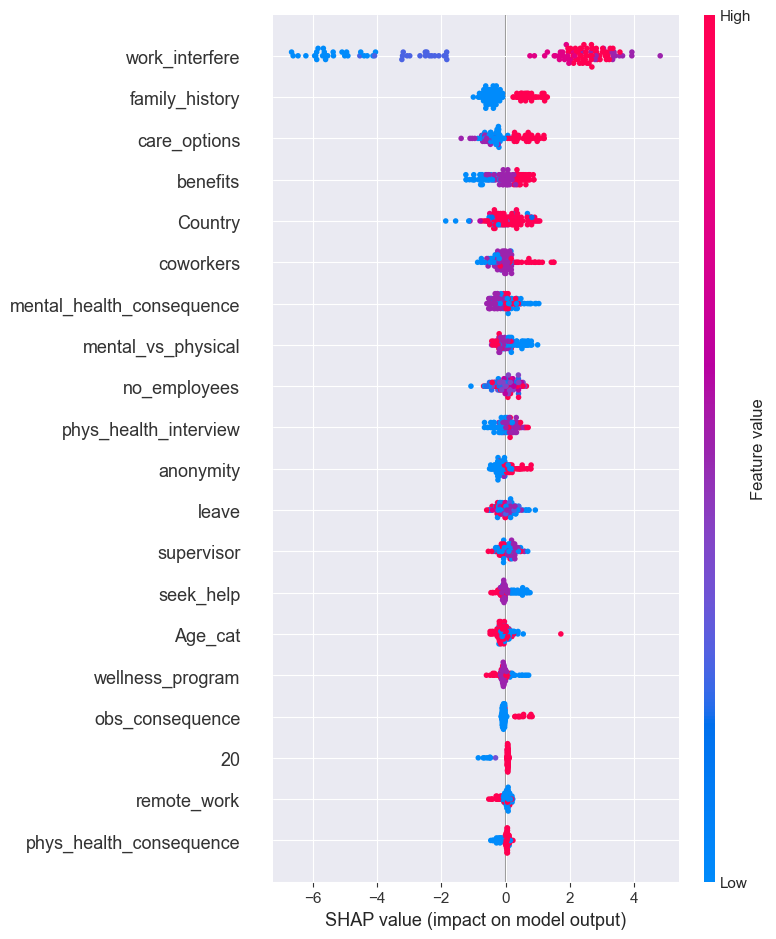

In [70]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_true = model.predict(X_val)
y_pred = model.predict(X_test)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=True)

shap_values = shap_values[:, :]
shap.summary_plot(shap_values, X_test)



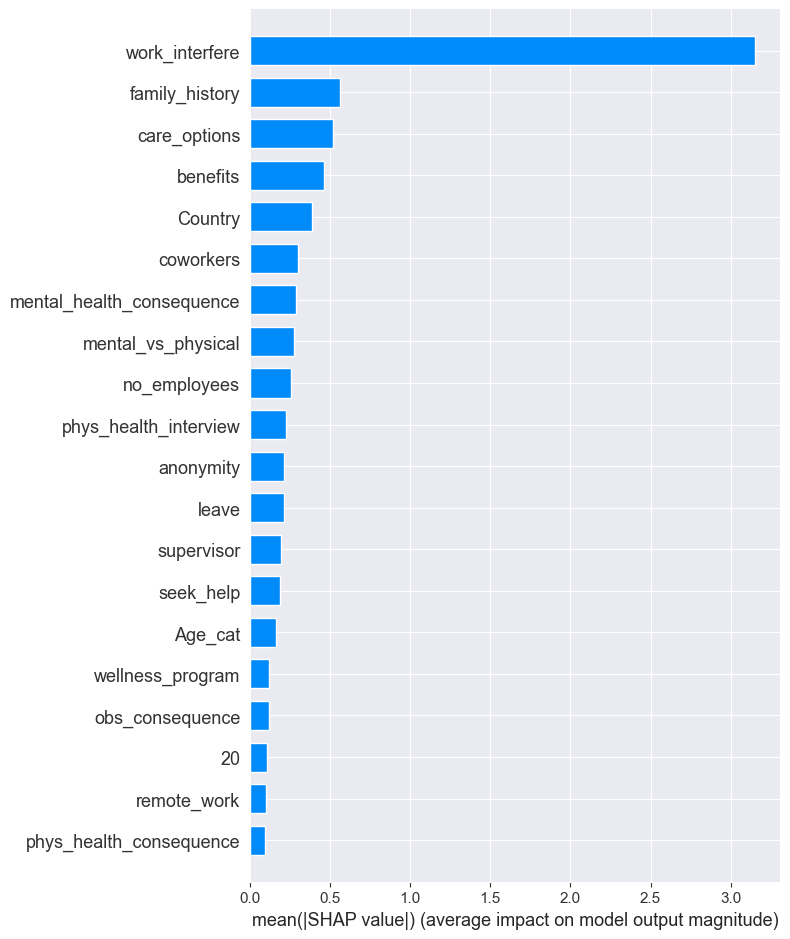

In [71]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

test results

In [72]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report: \n{report}")

Accuracy: 0.8015873015873016
Precision: 0.7887323943661971
Recall: 0.8484848484848485
F1 Score: 0.8175182481751825
Confusion Matrix: 
[[45 15]
 [10 56]]
ROC AUC: 0.7992424242424243
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        60
           1       0.79      0.85      0.82        66

    accuracy                           0.80       126
   macro avg       0.80      0.80      0.80       126
weighted avg       0.80      0.80      0.80       126



validation results

In [73]:
accuracy = accuracy_score(y_val, y_true)
precision = precision_score(y_val, y_true)
recall = recall_score(y_val, y_true)
f1 = f1_score(y_val, y_true)
cm = confusion_matrix(y_val, y_true)
roc_auc = roc_auc_score(y_val, y_true)
report = classification_report(y_val, y_true)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report: \n{report}")

Accuracy: 0.7964601769911505
Precision: 0.7384615384615385
Recall: 0.8888888888888888
F1 Score: 0.8067226890756303
Confusion Matrix: 
[[42 17]
 [ 6 48]]
ROC AUC: 0.800376647834275
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        59
           1       0.74      0.89      0.81        54

    accuracy                           0.80       113
   macro avg       0.81      0.80      0.80       113
weighted avg       0.81      0.80      0.80       113



In [74]:
import pickle
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(model, f)

# with open("xgboost_model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

print("Model loaded successfully using Pickle!")


Model loaded successfully using Pickle!


# **Logistic Regression**

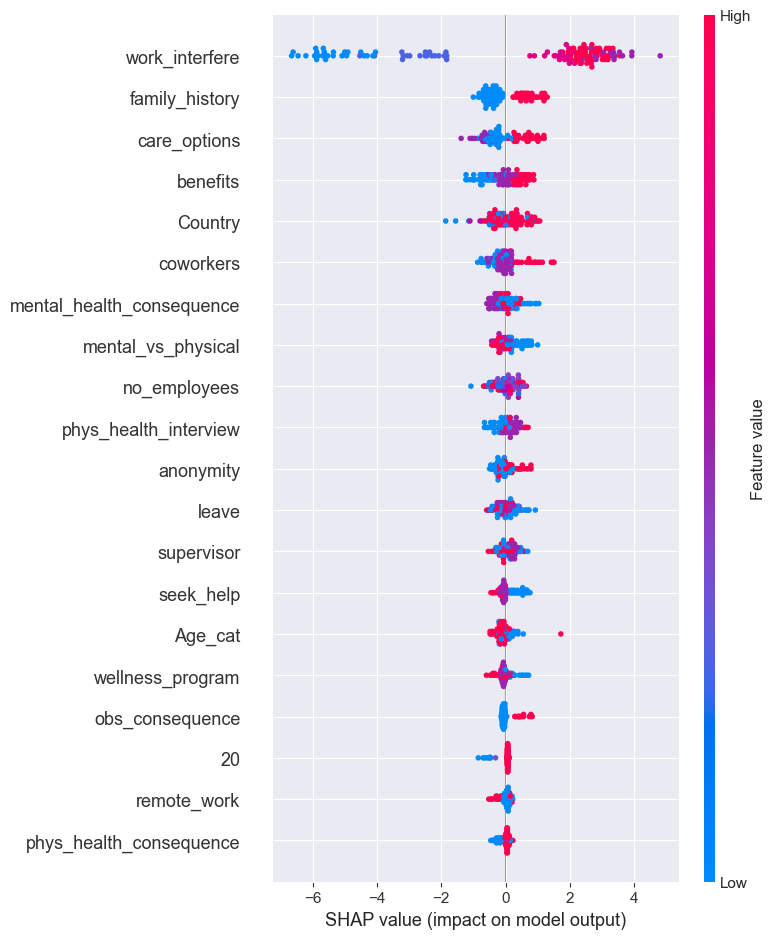

In [81]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_true = log_reg.predict(X_val)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=True)

# Choose a specific class (e.g., class 1)
shap_values = shap_values[:, :]
shap.summary_plot(shap_values, X_test)



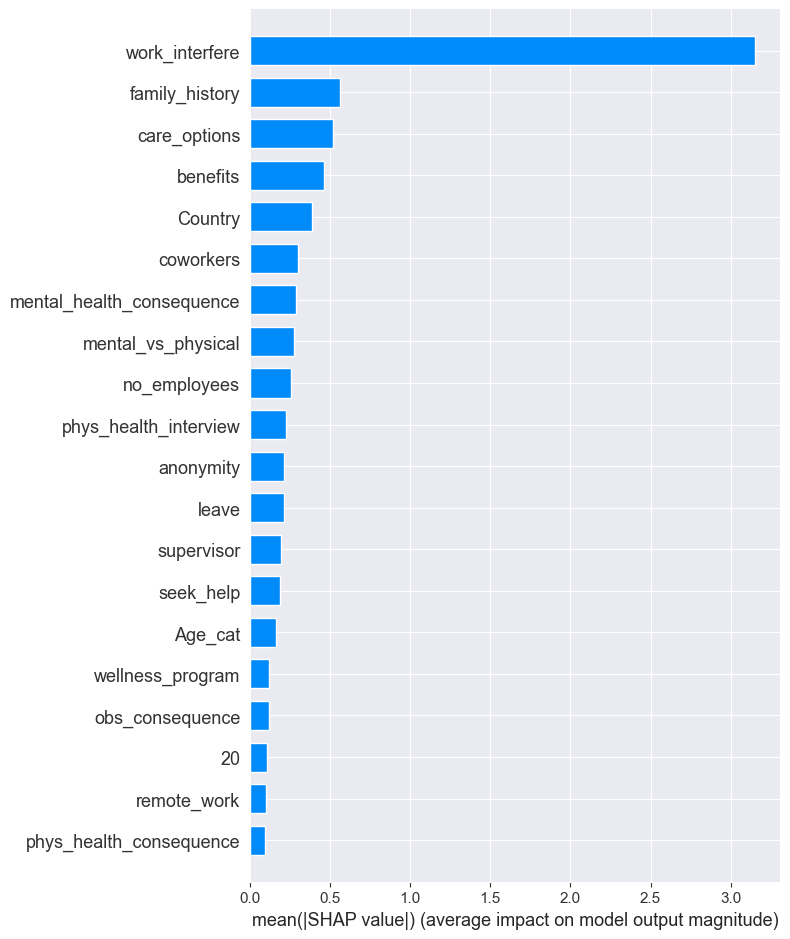

In [82]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

test results

In [83]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report: \n{report}")

Accuracy: 0.8015873015873016
Precision: 0.7971014492753623
Recall: 0.8333333333333334
F1 Score: 0.8148148148148148
Confusion Matrix: 
[[46 14]
 [11 55]]
ROC AUC: 0.8
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        60
           1       0.80      0.83      0.81        66

    accuracy                           0.80       126
   macro avg       0.80      0.80      0.80       126
weighted avg       0.80      0.80      0.80       126



validation results

In [84]:
accuracy = accuracy_score(y_val, y_true)
precision = precision_score(y_val, y_true)
recall = recall_score(y_val, y_true)
f1 = f1_score(y_val, y_true)
cm = confusion_matrix(y_val, y_true)
roc_auc = roc_auc_score(y_val, y_true)
report = classification_report(y_val, y_true)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{cm}")
print(f"ROC AUC: {roc_auc}")
print(f"Classification Report: \n{report}")

Accuracy: 0.8230088495575221
Precision: 0.7833333333333333
Recall: 0.8703703703703703
F1 Score: 0.8245614035087719
Confusion Matrix: 
[[46 13]
 [ 7 47]]
ROC AUC: 0.8250156936597615
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        59
           1       0.78      0.87      0.82        54

    accuracy                           0.82       113
   macro avg       0.83      0.83      0.82       113
weighted avg       0.83      0.82      0.82       113



In [85]:
import pickle
with open("lr_model.pkl", "wb") as f:
    pickle.dump(model, f)
    
# with open("lr_model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

print("Model loaded successfully using Pickle!")


Model loaded successfully using Pickle!


## Model Details

- **Model Used**: Both Random Forest and logistic Regression have Excellent performance across all metrics.
  The Logistic Regression model is used here in streamlit for its less computational cost.

- **File Storage**:  
  The pickle files for the model, label encoder, and ordinal encoder are stored and can be accessed.

- **Model Switching**:  
  To use a different model, simply change the file path to the new pickle file as needed.